In [1]:
%run 00.style.ipynb

/Users/piazza/Playground/tweet-in-love


In [2]:
import matplotlib.ticker as mtick
from tweet_in_love.settings import GlobalSettings

settings = GlobalSettings()

In [3]:
df = pd.read_csv(settings.raw_csv_path)
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
df.sample(10) #1000

,tweet_id,sentiment,content
130,1956997619,neutral,"claire @breakfastnt love the show, got into th..."
1592,1957347193,fun,Listening to some nice music.. I think I shoul...
4301,1960319406,happiness,Back home Had a great time!
29020,1751069422,neutral,"Hey the letter I sent finally came back today,..."
24866,1694952262,happiness,"@Sierrasnowboard under a week delivery to OZ, ..."
31030,1751818703,surprise,I had a great time at the surprise party! We g...
28496,1696218612,fun,@MichalkaAlyson I spell my name alyson too! Al...
28153,1696086886,hate,Iï¿½ï¿½m home I hate school! Now im going to ...
13808,1964211722,worry,i have so much homework i think i am going to...
20946,1694144724,sadness,"@orangeflowers I've run out of earl grey, so ..."


After inspection, all text seems in English, with a lot of typoes, slang and urls (as expected).

In [5]:
df.duplicated().sum()

0

In [6]:
# We don't need `tweet_id`
df.drop(columns=['tweet_id'], inplace=True)

In [7]:
df.duplicated().sum(), df[df.duplicated()].content.nunique()

(91, 50)

After removing tweet_id, we found 91 identical tweets, from 50 unique messages.

In [8]:
# show most duplicated rows
df.content.value_counts().to_frame().head(20)

,content
I just received a mothers day card from my lovely daughter wishing my a happy mothers day http://tr.im/kWK9,14
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone,13
Happy Mother's Day!,10
Happy Mothers Day,10
happy mother's day,8
http://snipurl.com/hq0n1 Just printed my mom an Amazon gift card for Happy Mothers Day talk about last minute.,7
Good Morning,6
happy mothers day,5
Good morning,5
0,4


In [9]:
df[df.duplicated()].sort_values('content').head(10)


,sentiment,content
31332,neutral,#frenchieb-day #frenchieb-day #frenchieb-day #...
31363,neutral,#frenchieb-day #frenchieb-day #frenchieb-day #...
29869,neutral,0
39415,neutral,0
30644,happiness,@JonathanRKnight BTW I STILL can't believe how...
39260,love,@RealHughJackman Wolverine is awesome.. love i...
37781,happiness,@andyclemmensen have you seen the game on the ...
10918,worry,@ericbolling Where's Dani Babb?
37807,love,@mari_possa Happy Happy Bday Baby Girl. Love Y...
30257,neutral,@mcraddictal


Sentiment labels are not univoque. We can find several sentiment for the same row.

In [10]:
#show number of different sentiment for identical rows
df.groupby(['content']).sentiment.nunique().sort_values(ascending=False).to_frame()

,sentiment
content,
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone,7
Happy Mothers Day,4
http://snipurl.com/hq0n1 Just printed my mom an Amazon gift card for Happy Mothers Day talk about last minute.,4
Happy Mother's Day!,4
Good morning,3
...,...
@leannarenee hope sequel edits go well me and my notebook will be looking for a place to sit after pt ;),1
@leannenufc Go for it! Chinese sounds yum!,1
@learymay Oooh... that's right by the zoo... think... in 2 months' time that could be our regular other meeting place,1


Not all mornings are equal ☕️ ...

In [11]:
df.query("content == 'Good Morning'").head(10)

,sentiment,content
23847,neutral,Good Morning
26407,neutral,Good Morning
27198,neutral,Good Morning
27407,love,Good Morning
28202,love,Good Morning
32823,neutral,Good Morning


... and not all Mothers are equal🤰 , either:

In [12]:
df.query("content == '''Happy Mother's Day!'''").head(10)

,sentiment,content
30563,happiness,Happy Mother's Day!
31699,happiness,Happy Mother's Day!
31931,love,Happy Mother's Day!
32399,surprise,Happy Mother's Day!
35295,love,Happy Mother's Day!
36286,love,Happy Mother's Day!
37159,neutral,Happy Mother's Day!
37305,love,Happy Mother's Day!
37327,love,Happy Mother's Day!
38806,love,Happy Mother's Day!


CAPS and punctuation are of important:

In [13]:
df[df.content.str.contains(r"^(?i)happy mother's Day\W+$")]

,sentiment,content
30563,happiness,Happy Mother's Day!
31699,happiness,Happy Mother's Day!
31931,love,Happy Mother's Day!
32399,surprise,Happy Mother's Day!
32529,love,happy mother's day!!!
32734,happiness,happy mother's day!
32966,love,HAPPY MOTHER'S DAY!!!!!
33144,love,happy mother's day!
34300,love,Happy Mother's Day.
35035,love,Happy Mother's Day!!!!!!!!!!!!!!!!!!!!!!!!!!!!...


In [18]:
counts = df.sentiment.value_counts()

_df = pd.DataFrame({
    'counts': counts,
    'perc': counts / df.sentiment.count()
}).rename_axis('sentiment')

In [20]:
_df

,counts,perc
sentiment,,
neutral,8638,0.215950
worry,8459,0.211475
happiness,5209,0.130225
sadness,5165,0.129125
love,3842,0.096050
surprise,2187,0.054675
fun,1776,0.044400
relief,1526,0.038150
hate,1323,0.033075


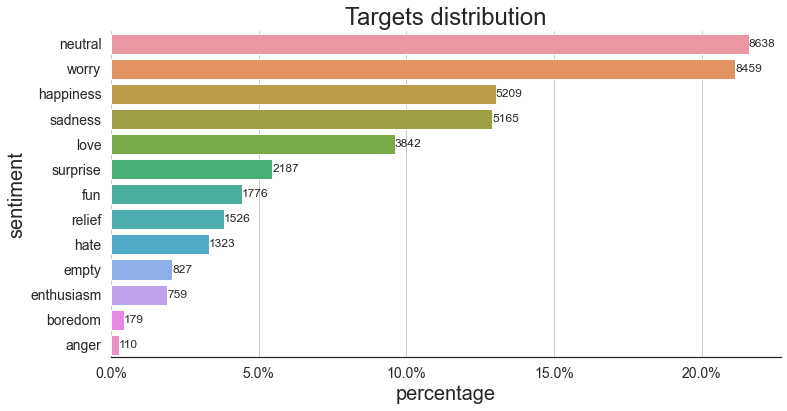

In [33]:
with plot_style():

    counts = df.sentiment.value_counts()

    _df = pd.DataFrame({
        'counts': counts,
        'percentage': counts / df.sentiment.count()
    }).rename_axis('sentiment')

    ax = sns.barplot(x='percentage', y='sentiment', data=_df.reset_index())

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.bar_label(ax.containers[0], labels=counts)
    plt.grid(axis='x')
    plt.title('Targets distribution')
    

In [35]:
_df

,counts,percentage
sentiment,,
neutral,8638,0.215950
worry,8459,0.211475
happiness,5209,0.130225
sadness,5165,0.129125
love,3842,0.096050
surprise,2187,0.054675
fun,1776,0.044400
relief,1526,0.038150
hate,1323,0.033075


- The dataset is unbalanced, `boredom` and `anger` are particularly poorly represented
- `empty` ? 

In [32]:
# Are there NA in the data?
df.isna().any()

sentiment    False
content      False
dtype: bool

In [38]:
# is `empty` our NA?
df.query("sentiment == 'empty'").sample(30)

,sentiment,content
22411,empty,@godskiwi lol I'm sure it would be the most k...
10619,empty,deadlines!
36205,empty,"@capricorn_one ok, I realise your up early bec..."
21123,empty,http://twitpic.com/4ja4b - me &amp; raj SQUAD ...
12697,empty,Playing games don't help me out of being bored!
37068,empty,"had a great night last night, and happy mother..."
27424,empty,@sroxy good morning...did you break 5 digits yet?
1742,empty,@106jackfm I'm not that's why I'm sulking not...
19876,empty,rickbaker24 follow me please. i only have 6
26259,empty,"@endlessblush I was ready half an hour ago, bu..."


- `empty` seems a confusing target for the training, because it combines positive and negative sentiments.

In [36]:
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [44]:
# show few samples per sentiment
df.groupby(['sentiment'])[['content']].apply(lambda x:x.sample(5)).droplevel(1)

,content
sentiment,
anger,finally home for once after a dope ass week
anger,my gawwddd ! 6 headshotss inna row? im on fyaa...
anger,@roberto121 that's some serious shit steve. wh...
anger,@LouGagliardi damned hordies
anger,"Grabbing a snack and a drink at chili's, but t..."
boredom,it's realy boo0o0o0o00oring ..my book is on th...
boredom,I am sooooooo bored in textiles !
boredom,@lmacken I'm stuck in a try-to-merge-two-tools...
boredom,Going crazy super head ach from hell and my t...


- a lot of `@mentions` that we should process separately
- 